In [1]:
# В этой работе мы сделаем собственноручно датасет (график синусоиды) и будем предсказывать каждое 10-ое значение.
# На протяжении всей работы будет несколько разных видов предсказании, о каждом расскажем подронее чуть позже

# Импорт библиотек


import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM, Input, Flatten
from tensorflow.keras.models import Model

In [3]:
# Создание "сырого" датасета

series = np.sin((0.1 * np.arange(400))**2)

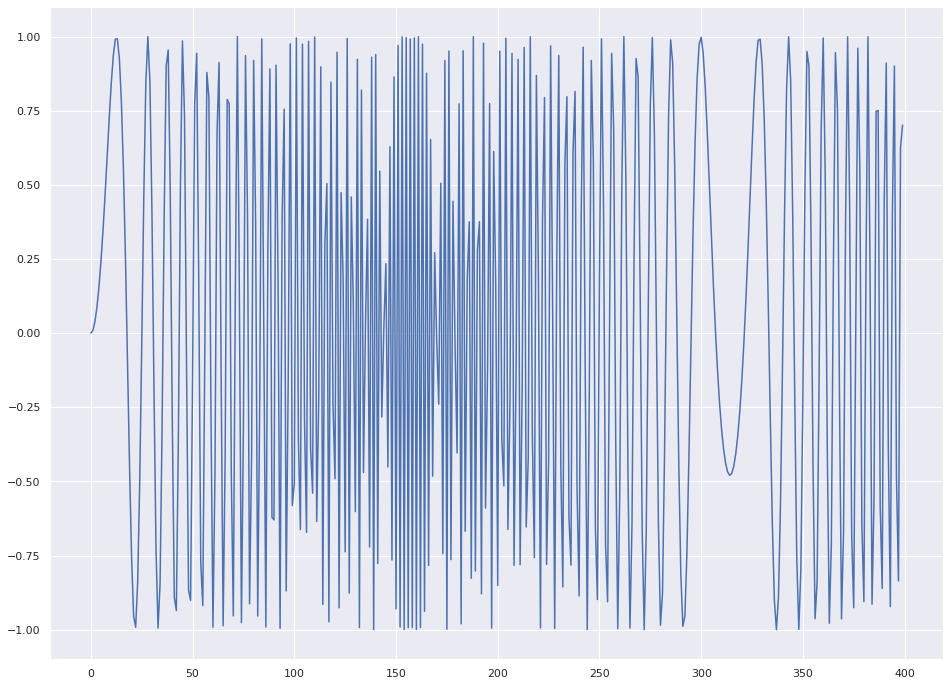

In [4]:
# Визуалиация датасета

plt.figure(figsize=[16,12])
plt.plot(series)

In [5]:
# Разбиение датасета на подсеты длиной 9 в список "X" и 10-ое целевое значение в список "Y". 
# По "X" будем предсказывать "Y" 


T = 10
D = 1 
X = []
Y = []
for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)
    
X = np.array(X).reshape(-1,T)
Y = np.array(Y)
N = len(X)

In [6]:
# Создание сети - 1-ин нейрон. Мы используем среднеквадратичную ошибку в данном примере т.к. наша задача не классификации, 
# а регрессии и поэтому ипользуем "mse"

i = Input(shape = (T,))
x = Dense(1)(i)
model = Model(i,x)
model.compile(loss = 'mse', optimizer = 'adam')

In [7]:
# Обучение модели, наш датасет будет пропущен 200 раз через сеть

r = model.fit(X[:-N//2], Y[:-N//2], epochs = 200, validation_data = (X[-N//2:], Y[-N//2:]))

Train on 195 samples, validate on 195 samples
Epoch 1/200
195/195 [==============================] - 0s 2ms/sample - loss: 1.7250 - val_loss: 2.1547
Epoch 2/200
195/195 [==============================] - 0s 240us/sample - loss: 1.6963 - val_loss: 2.1350
Epoch 3/200
195/195 [==============================] - 0s 244us/sample - loss: 1.6706 - val_loss: 2.1104
Epoch 4/200
195/195 [==============================] - 0s 233us/sample - loss: 1.6474 - val_loss: 2.0857
Epoch 5/200
195/195 [==============================] - 0s 213us/sample - loss: 1.6245 - val_loss: 2.0640
Epoch 6/200
195/195 [==============================] - 0s 210us/sample - loss: 1.6014 - val_loss: 2.0408
Epoch 7/200
195/195 [==============================] - 0s 241us/sample - loss: 1.5803 - val_loss: 2.0168
Epoch 8/200
195/195 [==============================] - 0s 198us/sample - loss: 1.5592 - val_loss: 1.9933
Epoch 9/200
195/195 [==============================] - 0s 252us/sample - loss: 1.5374 - val_loss: 1.9720
Epoch 10/20

Epoch 78/200
195/195 [==============================] - 0s 213us/sample - loss: 0.7372 - val_loss: 1.0654
Epoch 79/200
195/195 [==============================] - 0s 214us/sample - loss: 0.7321 - val_loss: 1.0586
Epoch 80/200
195/195 [==============================] - 0s 203us/sample - loss: 0.7269 - val_loss: 1.0520
Epoch 81/200
195/195 [==============================] - 0s 197us/sample - loss: 0.7219 - val_loss: 1.0443
Epoch 82/200
195/195 [==============================] - 0s 218us/sample - loss: 0.7173 - val_loss: 1.0370
Epoch 83/200
195/195 [==============================] - 0s 192us/sample - loss: 0.7125 - val_loss: 1.0300
Epoch 84/200
195/195 [==============================] - 0s 202us/sample - loss: 0.7077 - val_loss: 1.0220
Epoch 85/200
195/195 [==============================] - 0s 185us/sample - loss: 0.7027 - val_loss: 1.0135
Epoch 86/200
195/195 [==============================] - 0s 199us/sample - loss: 0.6979 - val_loss: 1.0042
Epoch 87/200
195/195 [========================

Epoch 155/200
195/195 [==============================] - 0s 211us/sample - loss: 0.5246 - val_loss: 0.6960
Epoch 156/200
195/195 [==============================] - 0s 200us/sample - loss: 0.5237 - val_loss: 0.6939
Epoch 157/200
195/195 [==============================] - 0s 183us/sample - loss: 0.5227 - val_loss: 0.6921
Epoch 158/200
195/195 [==============================] - 0s 198us/sample - loss: 0.5217 - val_loss: 0.6907
Epoch 159/200
195/195 [==============================] - 0s 226us/sample - loss: 0.5208 - val_loss: 0.6875
Epoch 160/200
195/195 [==============================] - 0s 202us/sample - loss: 0.5195 - val_loss: 0.6853
Epoch 161/200
195/195 [==============================] - 0s 209us/sample - loss: 0.5188 - val_loss: 0.6823
Epoch 162/200
195/195 [==============================] - 0s 200us/sample - loss: 0.5175 - val_loss: 0.6803
Epoch 163/200
195/195 [==============================] - 0s 219us/sample - loss: 0.5167 - val_loss: 0.6784
Epoch 164/200
195/195 [==============

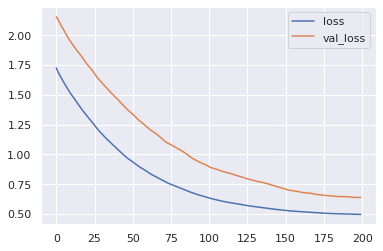

In [8]:
# Визуализация потерь

plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()


In [9]:
# Сохраняем предсказания в output 

output = model.predict(X)
print(output.shape)
predictions = output[:,0]     # Преобразуем данные в один список длиной 390

(390, 1)


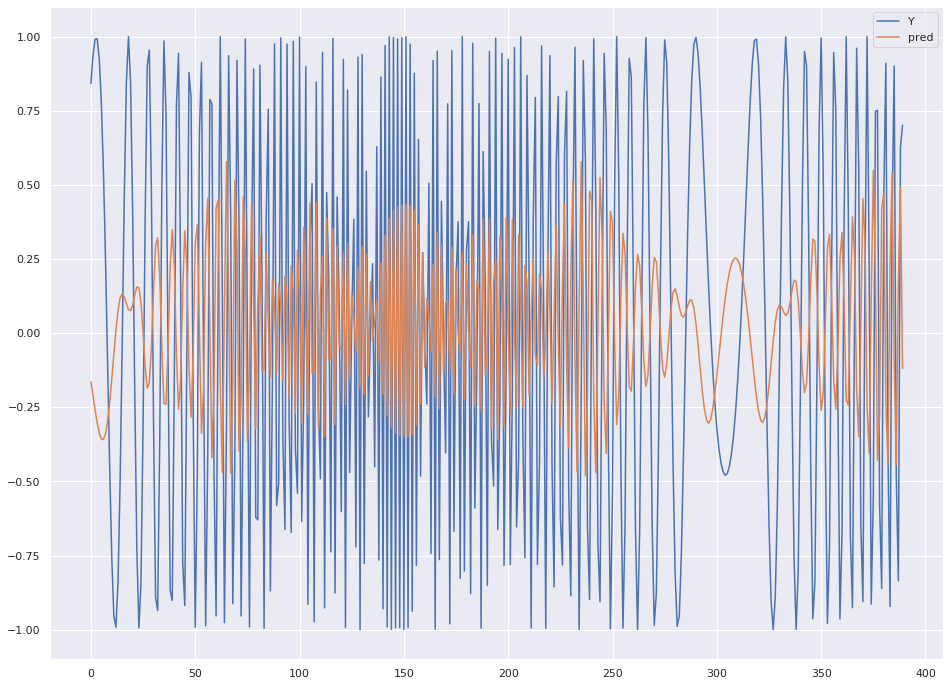

In [10]:
# Визуализация целевых и предсказанных значений

plt.figure(figsize = [16,12])
plt.plot(Y, label = 'Y')
plt.plot(predictions, label = 'pred')
plt.legend()

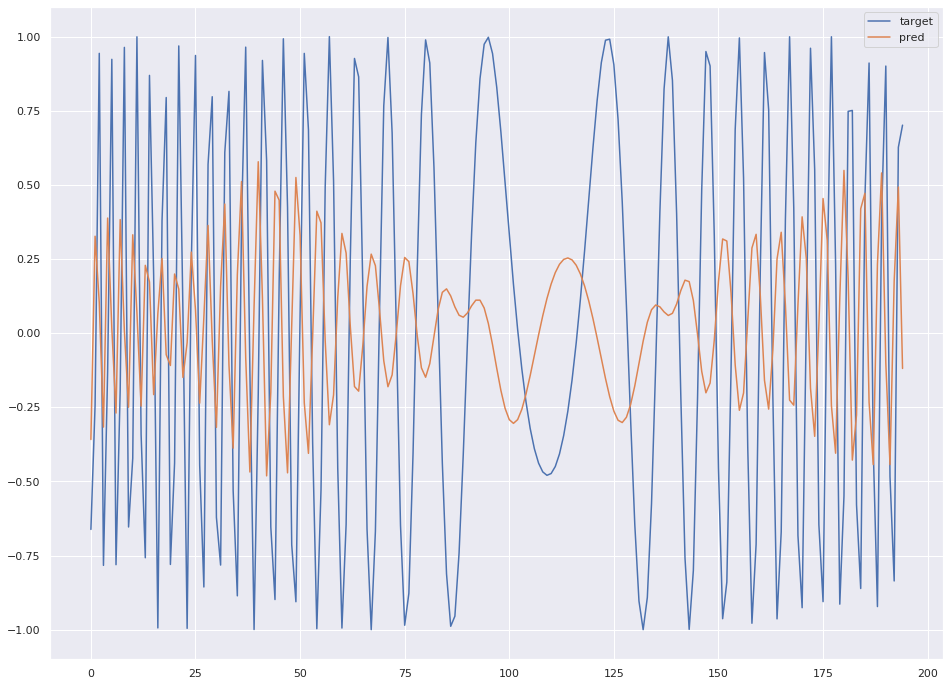

In [11]:
# В этом блоке ымы будем предсказывать каждое 10-ое значение синусоиды и в конце визуализируем результаты 


validation_target = Y[-N//2:]
validation_predictions = []

i = -N//2
while len(validation_target) > len(validation_predictions):
    p = model.predict(X[i].reshape(1,-1))[0,0]
    i += 1
    
    validation_predictions.append(p)
plt.figure(figsize=[16,12])
plt.plot(validation_target, label = 'target')
plt.plot(validation_predictions, label = 'pred')
plt.legend()

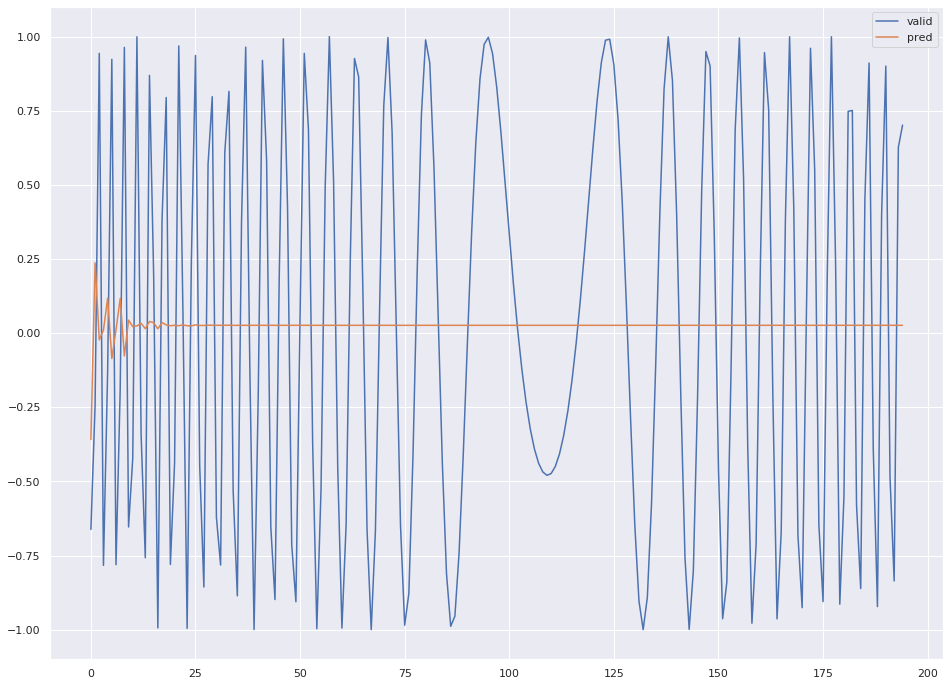

In [12]:
# В этом блоке мы будем предсказывать каждое 10-ое значение и после того как мы получим 10-ое значение,
# далее мы удаляем и списка 1-ое целевое значение и добавляем предсказанное значение и уже на основании обновленных данных (8-мь старых значений и 1-но предсказанное)
# мы сделаем новый прогноз. С каждым предсказанием наш список будет поплняться новым предсказанным значением и в конечом итоге 
# мы будем делать прогноз только на основании предсказанных значений


validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]
while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1,-1))[0,0]
    validation_predictions.append(p)
    last_x = np.roll(last_x, -1)
    last_x[-1] = p
plt.figure(figsize=[16,12])
plt.plot(validation_target, label = 'valid')
plt.plot(validation_predictions, label = 'pred')
plt.legend()


# Как мы можем видеть сеть просто центрируется и значения принимают средние значения

In [13]:
# Начиная с этого блока мы добавляем еще один слой в нашу сеть - обыкновенный рекурентный слой с 10-ью нейронами 

X = X.reshape(-1, T, 1)         # Приводим в определенную форму наши данные

i = Input(shape = (T,D))
x = SimpleRNN(10)(i)
x = Dense(1)(x)

model = Model(i,x)
model.compile(optimizer = 'adam', loss = 'mse')

r = model.fit(X[:-N//2], Y[:-N//2], batch_size = 32 ,epochs= 200, validation_data= (X[-N//2:], Y[-N//2:]))

Train on 195 samples, validate on 195 samples
Epoch 1/200
195/195 [==============================] - 1s 7ms/sample - loss: 0.9483 - val_loss: 0.7450
Epoch 2/200
195/195 [==============================] - 0s 412us/sample - loss: 0.8798 - val_loss: 0.7201
Epoch 3/200
195/195 [==============================] - 0s 390us/sample - loss: 0.8263 - val_loss: 0.7006
Epoch 4/200
195/195 [==============================] - 0s 408us/sample - loss: 0.7797 - val_loss: 0.6878
Epoch 5/200
195/195 [==============================] - 0s 412us/sample - loss: 0.7404 - val_loss: 0.6764
Epoch 6/200
195/195 [==============================] - 0s 393us/sample - loss: 0.7010 - val_loss: 0.6685
Epoch 7/200
195/195 [==============================] - 0s 401us/sample - loss: 0.6722 - val_loss: 0.6620
Epoch 8/200
195/195 [==============================] - 0s 393us/sample - loss: 0.6448 - val_loss: 0.6544
Epoch 9/200
195/195 [==============================] - 0s 381us/sample - loss: 0.6207 - val_loss: 0.6466
Epoch 10/20

Epoch 78/200
195/195 [==============================] - 0s 458us/sample - loss: 0.2582 - val_loss: 0.3415
Epoch 79/200
195/195 [==============================] - 0s 390us/sample - loss: 0.2561 - val_loss: 0.3378
Epoch 80/200
195/195 [==============================] - 0s 376us/sample - loss: 0.2522 - val_loss: 0.3345
Epoch 81/200
195/195 [==============================] - 0s 437us/sample - loss: 0.2497 - val_loss: 0.3352
Epoch 82/200
195/195 [==============================] - 0s 408us/sample - loss: 0.2476 - val_loss: 0.3336
Epoch 83/200
195/195 [==============================] - 0s 410us/sample - loss: 0.2446 - val_loss: 0.3292
Epoch 84/200
195/195 [==============================] - 0s 397us/sample - loss: 0.2412 - val_loss: 0.3260
Epoch 85/200
195/195 [==============================] - 0s 378us/sample - loss: 0.2385 - val_loss: 0.3259
Epoch 86/200
195/195 [==============================] - 0s 405us/sample - loss: 0.2356 - val_loss: 0.3254
Epoch 87/200
195/195 [========================

Epoch 155/200
195/195 [==============================] - 0s 414us/sample - loss: 0.1057 - val_loss: 0.2469
Epoch 156/200
195/195 [==============================] - 0s 422us/sample - loss: 0.1043 - val_loss: 0.2467
Epoch 157/200
195/195 [==============================] - 0s 439us/sample - loss: 0.1028 - val_loss: 0.2464
Epoch 158/200
195/195 [==============================] - 0s 384us/sample - loss: 0.1018 - val_loss: 0.2473
Epoch 159/200
195/195 [==============================] - 0s 380us/sample - loss: 0.1010 - val_loss: 0.2495
Epoch 160/200
195/195 [==============================] - 0s 420us/sample - loss: 0.1006 - val_loss: 0.2487
Epoch 161/200
195/195 [==============================] - 0s 434us/sample - loss: 0.0993 - val_loss: 0.2478
Epoch 162/200
195/195 [==============================] - 0s 416us/sample - loss: 0.0985 - val_loss: 0.2441
Epoch 163/200
195/195 [==============================] - 0s 408us/sample - loss: 0.0970 - val_loss: 0.2431
Epoch 164/200
195/195 [==============

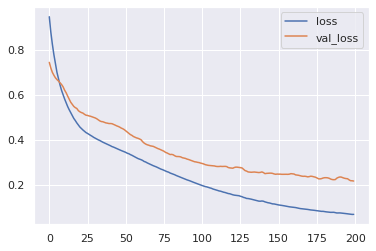

In [14]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

(390, 1)


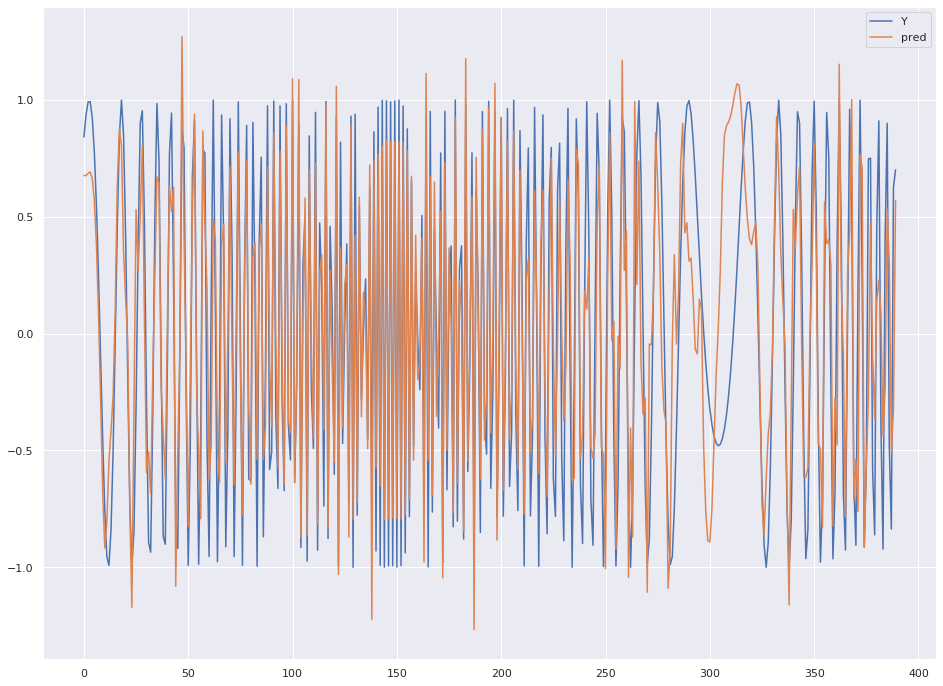

In [15]:
# Сохраняем результаты предсказания и визуализируем их вместе с целевыми данными

output = model.predict(X)
print(output.shape)
predictions = output[:,0]
plt.figure(figsize=[16,12])
plt.plot(Y, label = 'Y')
plt.plot(predictions, label = 'pred')
plt.legend()

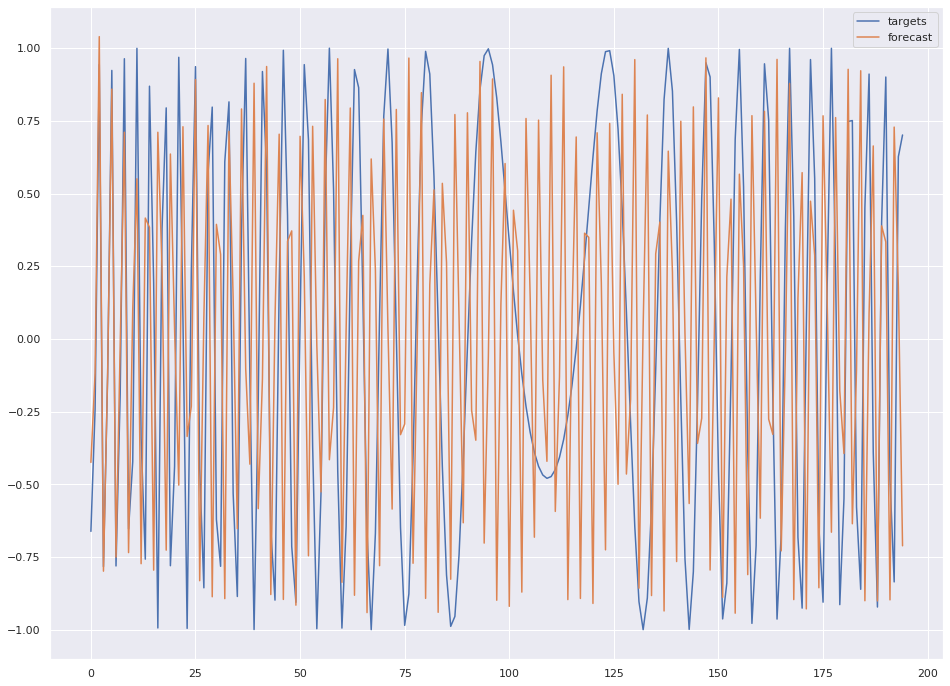

In [16]:
# В этом блоке мы будем предсказывать каждое 10-ое значение и после того как мы получим 10-ое значение,
# далее мы удаляем и списка 1-ое целевое значение и добавляем предсказанное значение и уже на основании обновленных данных (8-мь старых значений и 1-но предсказанное)
# мы сделаем новый прогноз. С каждым предсказанием наш список будет поплняться новым предсказанным значением и в конечом итоге 
# мы будем делать прогноз только на основании предсказанных значений


forecast = []
input_ = X[-N//2]
while len(forecast) < len(Y)//2:
    f = model.predict(input_.reshape(1,T,1))[0,0]
    forecast.append(f)
    input_ = np.roll(input_, -1)
    input_[-1] = f
plt.figure(figsize=[16,12])
plt.plot(Y[-N//2:], label = 'targets')
plt.plot(forecast, label = 'forecast')
plt.legend()

In [17]:
# Работаем со слоем LSTM

i = Input(shape =(T,D))
x = LSTM(10)(i)
x = Dense(1)(x)

model.compile(optimizer = 'adam', loss= 'mse')
r = model.fit(X[:-N//2], Y[:-N//2], epochs = 150, validation_data=(X[-N//2:], Y[-N//2:]))

Train on 195 samples, validate on 195 samples
Epoch 1/150
195/195 [==============================] - 1s 8ms/sample - loss: 0.0686 - val_loss: 0.2155
Epoch 2/150
195/195 [==============================] - 0s 553us/sample - loss: 0.0657 - val_loss: 0.2177
Epoch 3/150
195/195 [==============================] - 0s 504us/sample - loss: 0.0646 - val_loss: 0.2208
Epoch 4/150
195/195 [==============================] - 0s 422us/sample - loss: 0.0643 - val_loss: 0.2201
Epoch 5/150
195/195 [==============================] - 0s 402us/sample - loss: 0.0638 - val_loss: 0.2175
Epoch 6/150
195/195 [==============================] - 0s 412us/sample - loss: 0.0625 - val_loss: 0.2106
Epoch 7/150
195/195 [==============================] - 0s 415us/sample - loss: 0.0617 - val_loss: 0.2063
Epoch 8/150
195/195 [==============================] - 0s 370us/sample - loss: 0.0603 - val_loss: 0.2028
Epoch 9/150
195/195 [==============================] - 0s 422us/sample - loss: 0.0600 - val_loss: 0.2038
Epoch 10/15

Epoch 78/150
195/195 [==============================] - 0s 520us/sample - loss: 0.0332 - val_loss: 0.1880
Epoch 79/150
195/195 [==============================] - 0s 473us/sample - loss: 0.0329 - val_loss: 0.1878
Epoch 80/150
195/195 [==============================] - 0s 415us/sample - loss: 0.0327 - val_loss: 0.1871
Epoch 81/150
195/195 [==============================] - 0s 402us/sample - loss: 0.0327 - val_loss: 0.1874
Epoch 82/150
195/195 [==============================] - 0s 386us/sample - loss: 0.0325 - val_loss: 0.1853
Epoch 83/150
195/195 [==============================] - 0s 515us/sample - loss: 0.0316 - val_loss: 0.1831
Epoch 84/150
195/195 [==============================] - 0s 508us/sample - loss: 0.0320 - val_loss: 0.1821
Epoch 85/150
195/195 [==============================] - 0s 419us/sample - loss: 0.0323 - val_loss: 0.1855
Epoch 86/150
195/195 [==============================] - 0s 397us/sample - loss: 0.0318 - val_loss: 0.1831
Epoch 87/150
195/195 [========================

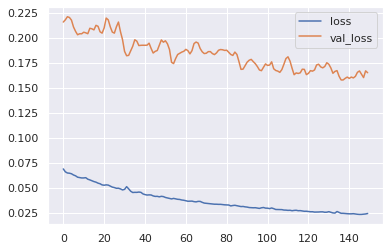

In [18]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()